# Implement the Continuous Bag of Words (CBOW) Model for the given (textual document 1) using the below steps:
* a. Data preparation
* b. Generate training data
* c. Train model
* d. Output

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Lambda, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import re

# A. Data Preparation

In [27]:
data = []
with open("../datasets/CBOW(Ass5)/CBOW.txt") as file:
    for para in file:
        data.append(para.strip())

data

['The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19.',
 '',
 'Further, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission –transmission of the virus before the appearance of symptoms – is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission.',
 '',
 'The reproductive number – the number of secondary infections generated from one infected individual – is understood 

In [28]:
corpus = []
for para in data:
    if para == "" :
        continue
    
    para = re.sub("[^A-Za-z0-9]+", " ", para)
    
    corpus.append(para.strip())
    
corpus

['The speed of transmission is an important point of difference between the two viruses Influenza has a shorter median incubation period the time from infection to appearance of symptoms and a shorter serial interval the time between successive cases than COVID 19 virus The serial interval for COVID 19 virus is estimated to be 5 6 days while for influenza virus the serial interval is 3 days This means that influenza can spread faster than COVID 19',
 'Further transmission in the first 3 5 days of illness or potentially pre symptomatic transmission transmission of the virus before the appearance of symptoms is a major driver of transmission for influenza In contrast while we are learning that there are people who can shed COVID 19 virus 24 48 hours prior to symptom onset at present this does not appear to be a major driver of transmission',
 'The reproductive number the number of secondary infections generated from one infected individual is understood to be between 2 and 2 5 for COVID 

# Generating Training Data

In [29]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

print(sequences)

[[1, 37, 2, 3, 9, 38, 39, 40, 2, 41, 13, 1, 42, 22, 4, 43, 11, 23, 44, 45, 46, 1, 14, 24, 47, 10, 25, 2, 26, 12, 11, 23, 15, 16, 1, 14, 13, 48, 49, 17, 5, 6, 7, 1, 15, 16, 8, 5, 6, 7, 9, 50, 10, 18, 19, 51, 20, 27, 8, 4, 7, 1, 15, 16, 9, 28, 20, 29, 52, 30, 4, 31, 53, 54, 17, 5, 6], [55, 3, 32, 1, 56, 28, 19, 20, 2, 57, 58, 59, 60, 61, 3, 3, 2, 1, 7, 62, 1, 25, 2, 26, 9, 11, 33, 34, 2, 3, 8, 4, 32, 63, 27, 64, 21, 65, 30, 66, 21, 67, 68, 31, 69, 5, 6, 7, 70, 71, 72, 73, 10, 74, 75, 76, 77, 29, 78, 79, 80, 10, 18, 11, 33, 34, 2, 3], [1, 81, 35, 1, 35, 2, 82, 83, 84, 24, 85, 86, 87, 9, 88, 10, 18, 13, 36, 12, 36, 19, 8, 5, 6, 7, 89, 17, 8, 4, 90, 91, 8, 92, 5, 6, 12, 4, 22, 21, 93, 94, 12, 14, 95, 96, 97, 98, 99, 100]]


In [30]:
index_to_word_map = {}
word_to_index_map = {}
for index1, sequence in enumerate(sequences):
    print(sequence)
    words_in_sequence = corpus[index1].split()
    print(words_in_sequence)
    for i, val in enumerate(sequence):
        index_to_word_map[val] = words_in_sequence[i]
        word_to_index_map[words_in_sequence[i]] = val

[1, 37, 2, 3, 9, 38, 39, 40, 2, 41, 13, 1, 42, 22, 4, 43, 11, 23, 44, 45, 46, 1, 14, 24, 47, 10, 25, 2, 26, 12, 11, 23, 15, 16, 1, 14, 13, 48, 49, 17, 5, 6, 7, 1, 15, 16, 8, 5, 6, 7, 9, 50, 10, 18, 19, 51, 20, 27, 8, 4, 7, 1, 15, 16, 9, 28, 20, 29, 52, 30, 4, 31, 53, 54, 17, 5, 6]
['The', 'speed', 'of', 'transmission', 'is', 'an', 'important', 'point', 'of', 'difference', 'between', 'the', 'two', 'viruses', 'Influenza', 'has', 'a', 'shorter', 'median', 'incubation', 'period', 'the', 'time', 'from', 'infection', 'to', 'appearance', 'of', 'symptoms', 'and', 'a', 'shorter', 'serial', 'interval', 'the', 'time', 'between', 'successive', 'cases', 'than', 'COVID', '19', 'virus', 'The', 'serial', 'interval', 'for', 'COVID', '19', 'virus', 'is', 'estimated', 'to', 'be', '5', '6', 'days', 'while', 'for', 'influenza', 'virus', 'the', 'serial', 'interval', 'is', '3', 'days', 'This', 'means', 'that', 'influenza', 'can', 'spread', 'faster', 'than', 'COVID', '19']
[55, 3, 32, 1, 56, 28, 19, 20, 2, 57

In [31]:
print(index_to_word_map)
print("\n======================\n")
print(word_to_index_map)

{1: 'the', 37: 'speed', 2: 'of', 3: 'transmission', 9: 'is', 38: 'an', 39: 'important', 40: 'point', 41: 'difference', 13: 'between', 42: 'two', 22: 'viruses', 4: 'influenza', 43: 'has', 11: 'a', 23: 'shorter', 44: 'median', 45: 'incubation', 46: 'period', 14: 'time', 24: 'from', 47: 'infection', 10: 'to', 25: 'appearance', 26: 'symptoms', 12: 'and', 15: 'serial', 16: 'interval', 48: 'successive', 49: 'cases', 17: 'than', 5: 'COVID', 6: '19', 7: 'virus', 8: 'for', 50: 'estimated', 18: 'be', 19: '5', 51: '6', 20: 'days', 27: 'while', 28: '3', 29: 'this', 52: 'means', 30: 'that', 31: 'can', 53: 'spread', 54: 'faster', 55: 'Further', 32: 'In', 56: 'first', 57: 'illness', 58: 'or', 59: 'potentially', 60: 'pre', 61: 'symptomatic', 62: 'before', 33: 'major', 34: 'driver', 63: 'contrast', 64: 'we', 21: 'are', 65: 'learning', 66: 'there', 67: 'people', 68: 'who', 69: 'shed', 70: '24', 71: '48', 72: 'hours', 73: 'prior', 74: 'symptom', 75: 'onset', 76: 'at', 77: 'present', 78: 'does', 79: 'not'

In [32]:
contexts = []
targets = []

window_size = 2

for sequence in sequences:
    for i in range(window_size, len(sequence) - window_size):
        context = sequence[i - window_size : i] + sequence[i + 1 : i + window_size + 1]
        target = sequence[i]
        
        contexts.append(context)
        targets.append(target)

print(contexts)
print("\n===============\n")
print(targets)

[[1, 37, 3, 9], [37, 2, 9, 38], [2, 3, 38, 39], [3, 9, 39, 40], [9, 38, 40, 2], [38, 39, 2, 41], [39, 40, 41, 13], [40, 2, 13, 1], [2, 41, 1, 42], [41, 13, 42, 22], [13, 1, 22, 4], [1, 42, 4, 43], [42, 22, 43, 11], [22, 4, 11, 23], [4, 43, 23, 44], [43, 11, 44, 45], [11, 23, 45, 46], [23, 44, 46, 1], [44, 45, 1, 14], [45, 46, 14, 24], [46, 1, 24, 47], [1, 14, 47, 10], [14, 24, 10, 25], [24, 47, 25, 2], [47, 10, 2, 26], [10, 25, 26, 12], [25, 2, 12, 11], [2, 26, 11, 23], [26, 12, 23, 15], [12, 11, 15, 16], [11, 23, 16, 1], [23, 15, 1, 14], [15, 16, 14, 13], [16, 1, 13, 48], [1, 14, 48, 49], [14, 13, 49, 17], [13, 48, 17, 5], [48, 49, 5, 6], [49, 17, 6, 7], [17, 5, 7, 1], [5, 6, 1, 15], [6, 7, 15, 16], [7, 1, 16, 8], [1, 15, 8, 5], [15, 16, 5, 6], [16, 8, 6, 7], [8, 5, 7, 9], [5, 6, 9, 50], [6, 7, 50, 10], [7, 9, 10, 18], [9, 50, 18, 19], [50, 10, 19, 51], [10, 18, 51, 20], [18, 19, 20, 27], [19, 51, 27, 8], [51, 20, 8, 4], [20, 27, 4, 7], [27, 8, 7, 1], [8, 4, 1, 15], [4, 7, 15, 16], [7

In [33]:
x = np.array(contexts)
y = np.array(targets)

In [34]:
# sample of training data
for i in range(5):
    words = []
    target = index_to_word_map.get(targets[i])
    for j in contexts[i]:
        words.append(index_to_word_map.get(j))
    print(words, "=>", target)

['the', 'speed', 'transmission', 'is'] => of
['speed', 'of', 'is', 'an'] => transmission
['of', 'transmission', 'an', 'important'] => is
['transmission', 'is', 'important', 'point'] => an
['is', 'an', 'point', 'of'] => important


In [35]:
input_dim = len(tokenizer.word_counts) + 1
embedding_size = 10

In [36]:
model = Sequential([
    Embedding(input_dim, embedding_size, input_length=2*window_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(128, "relu"),
    Dense(64, "relu"),
    Dense(input_dim, "softmax")
])

In [37]:
model.compile("adam", "sparse_categorical_crossentropy", ["accuracy"])

In [38]:
model.fit(x, y, epochs=200)

Epoch 1/200
6/6 [==============================] - 1s 69ms/step - loss: 4.6143 - accuracy: 0.0273
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 4.6078 - accuracy: 0.0546
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 4.6016 - accuracy: 0.0656
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 4.5931 - accuracy: 0.0601
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 4.5815 - accuracy: 0.0546
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 4.5657 - accuracy: 0.0437
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 4.5430 - accuracy: 0.0437
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 4.5102 - accuracy: 0.0437
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 4.4658 - accuracy: 0.0437
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 4.4124 - accuracy: 0.0437
Epoch 11/200
6/6 [==========

6/6 [==============================] - 0s 3ms/step - loss: 0.6576 - accuracy: 0.9126
Epoch 85/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6345 - accuracy: 0.8962
Epoch 86/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6080 - accuracy: 0.9126
Epoch 87/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5865 - accuracy: 0.9180
Epoch 88/200
6/6 [==============================] - 0s 4ms/step - loss: 0.5658 - accuracy: 0.9126
Epoch 89/200
6/6 [==============================] - 0s 4ms/step - loss: 0.5495 - accuracy: 0.9180
Epoch 90/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5228 - accuracy: 0.9235
Epoch 91/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5079 - accuracy: 0.9344
Epoch 92/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4899 - accuracy: 0.9399
Epoch 93/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4774 - accuracy: 0.9454
Epoch 94/200
6/6 [===============

6/6 [==============================] - 0s 4ms/step - loss: 0.0496 - accuracy: 1.0000
Epoch 168/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0486 - accuracy: 1.0000
Epoch 169/200
6/6 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 1.0000
Epoch 170/200
6/6 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 1.0000
Epoch 171/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0451 - accuracy: 1.0000
Epoch 172/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0438 - accuracy: 1.0000
Epoch 173/200
6/6 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 1.0000
Epoch 174/200
6/6 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 1.0000
Epoch 175/200
6/6 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 1.0000
Epoch 176/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0404 - accuracy: 1.0000
Epoch 177/200
6/6 [=====

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 10)             1010      
                                                                 
 lambda_1 (Lambda)           (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               1408      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 101)               6565      
                                                                 
Total params: 17239 (67.34 KB)
Trainable params: 17239 (67.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# Get the word embeddings
weights = model.get_weights()[0]

In [43]:
# Perform PCA to reduce 
pca = PCA(2)
reduce_weights = pca.fit_transform(weights)

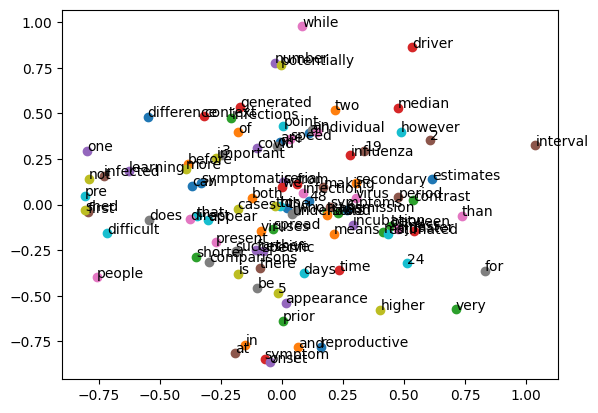

In [44]:
# visualize the embeddings
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduce_weights[i]
    plt.scatter(x,y)
    plt.annotate(word, (x,y))
plt.show()